TRABAJO PRACTICO NÚMERO 1 EDGAR CORREA DIAZGRANADOS

# Redes Neuronales Artificiales

In [ ]:
# usar https://scikit-learn.org/stable/modules/neural_networks_supervised.html

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Lectura de datos

## 1.1. Planteamiento del problema

Una empresa automovilística china, Geely Auto, aspira a entrar en el mercado estadounidense estableciendo allí su unidad de fabricación y producción de automóviles localmente para competir con sus contrapartes estadounidenses y europeas.

Han contratado a una empresa de consultoría de automóviles para comprender los factores de los que depende el precio de los automóviles. Específicamente, quieren comprender los factores que afectan el precio de los automóviles en el mercado estadounidense, ya que pueden ser muy diferentes del mercado chino. La empresa quiere saber:

¿Qué variables son significativas para predecir el precio de un automóvil?
Qué tan bien esas variables describen el precio de un automóvil
Con base en varias encuestas de mercado, la consultora ha recopilado un gran conjunto de datos de diferentes tipos de automóviles en todo el mercado estadounidense.

## 1.2 Objetivo comercial

El  objetivo es  modelar el precio de los automóviles con las variables independientes disponibles. Dicho modelo será utilizado por la gerencia para comprender cómo varían exactamente los precios con las variables independientes. En consecuencia, pueden manipular el diseño de los automóviles, la estrategia comercial, etc. para cumplir con ciertos niveles de precios. Además, el modelo será una buena manera para que la gerencia entienda la dinámica de precios de un nuevo mercado.

In [ ]:
# https://www.kaggle.com/datasets/hellbuoy/car-price-prediction

df = pd.read_csv("/content/CarPrice_Assignment.csv")
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


# 2. Análisis de datos

se tienen 26 variables y se comienza a analizar cada una



*   Car_id: Identificación única de cada observación (Interger)
*   Symboling: Su calificación de riesgo de seguro asignada, un valor de +3 indica que el automóvil es riesgoso, -3 que probablemente sea bastante seguro. (Categórico)
*  CarName: Nombre de la compañía de automóviles (Categórica)
* Fueltype: Tipo de combustible del automóvil, es decir, gasolina o diésel (categórico)
* Aspiration: Aspiración utilizada en un automóvil (Categórico)
* Doornumber: Número de puertas(Categorico)
* Carbody: carroceria(categorica)
*  Drivewheel: Tipo de rueda motriz (Categórico)
* Enginelocation: Ubicación del motor del automóvil (Categórico)
* Wheelbase: Distancia entre ejes del coche (numérico)
* Carlength: Distancia entre ejes del coche (numérico)
* Carwidth:  Ancho del coche (numérico)
* Carheight: altura del coche (numérico)
* curbweight: El peso de un automóvil sin ocupantes ni equipaje. (Numérico)
* Enginetype: Tipo de motor (Categórico)
* Cylindernumber: Cilindro colocado en el carro (Categorico)
* Enginesize:  Tamaño del coche (numérico)
* Fuelsystem: Sistema de combustible del coche (Categorico)
* Boreratio: Boreratio del coche (numérico)
* Stroke: Carrera o volumen dentro del motor (Numérico)
* Compressionratio: Relación de compresión del coche (numérico)
* Horsepower : Caballos de fuerza (numéricos)
* Peakrpm: RPM pico del coche (numérico)
* Citympg: Kilometraje en ciudad (numérico)
* Highwaympg: Kilometraje en carretera (numérico)
* Price: Precio del coche (Numérico)  


In [ ]:
df.info() # con el fin de saber el tipo de los datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
df.isnull().sum()# con el fin de saber si hay datos nulos

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

No hay datos nulos

In [ ]:
df=df.drop(['car_ID'],axis=1) # el id se elimina

In [ ]:
df['symboling']=df['symboling'].astype('str')# se clasifica como una variable categorica

In [ ]:
df['CarName'] = df['CarName'].str.split(' ',expand=True)[0]
df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [ ]:
df['CarName'] = df['CarName'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota',
                            'vokswagen': 'volkswagen', 'vw': 'volkswagen'})
df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

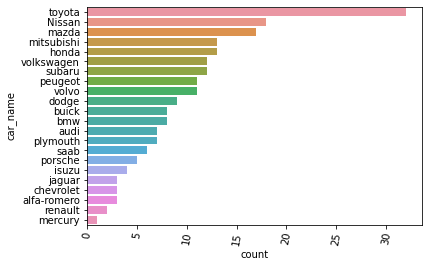

In [ ]:
df_v=pd.DataFrame(df['CarName'].value_counts()).reset_index().rename(columns={'index':'car_name','CarName': 'count'})
plot = sns.barplot(y='car_name',x='count',data=df_v)
plot=plt.setp(plot.get_xticklabels(), rotation=80)

se agrupan las variables entre categoricas y númericas

## Categoricas


In [ ]:
categoricas_ = df.select_dtypes(include=['object']).columns
categoricas_

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'enginetype',
       'cylindernumber', 'fuelsystem'],
      dtype='object')

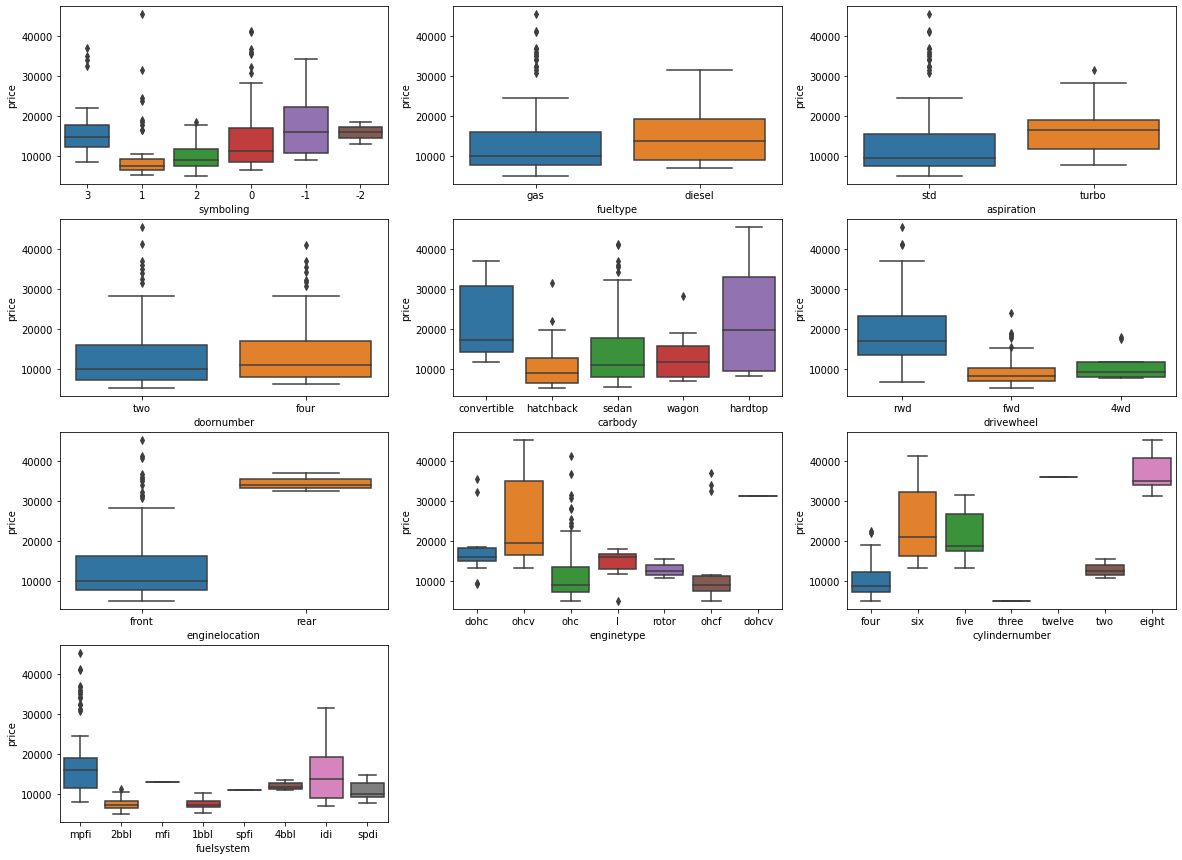

In [ ]:
plt.figure(figsize=(20, 15))

plt.subplot(4,3,1)
sns.boxplot(x = 'symboling', y = 'price', data = df)
plt.subplot(4,3,2)
sns.boxplot(x = 'fueltype', y = 'price', data = df)
plt.subplot(4,3,3)
sns.boxplot(x = 'aspiration', y = 'price', data = df)
plt.subplot(4,3,4)
sns.boxplot(x = 'doornumber', y = 'price', data = df)
plt.subplot(4,3,5)
sns.boxplot(x = 'carbody', y = 'price', data = df)
plt.subplot(4,3,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = df)
plt.subplot(4,3,7)
sns.boxplot(x = 'enginelocation', y = 'price', data = df)
plt.subplot(4,3,8)
sns.boxplot(x = 'enginetype', y = 'price', data = df)
plt.subplot(4,3,9)
sns.boxplot(x = 'cylindernumber', y = 'price', data = df)
plt.subplot(4,3,10)
sns.boxplot(x = 'fuelsystem', y = 'price', data = df)
plt.show()

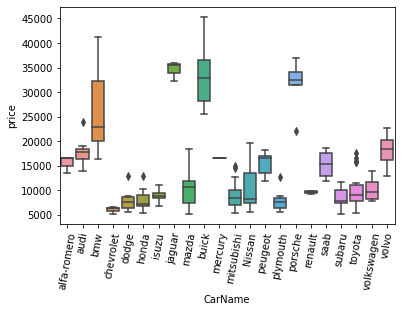

In [ ]:
plot = sns.boxplot(x = 'CarName', y = 'price', data = df)
plot=plt.setp(plot.get_xticklabels(), rotation=80)

A partir del analisis descriptivo previo a realizar un modelo se pueden ver algunos datos como:

* Los autos mas seguros costaran más
*  Los automoviles que funcionan con  diesel son más caros que los que funcionan con gas
*  Los carros con turbo son mas costosos que los carros que funcionan con std de aspiration
* El numero de puertas no representa una gran diferencia en el precio de los vehiculos
* Los carros convertibles son mas costosos  
*  El tipo de rueda motriz rwd  genera que el costo sea mayor
* La ubicación del motor en la parte trasera del auto aumento el valor del auto
* El tipo de motor dohcv y ohcv aumneta el valor del vehiculo
* Tener 8 cilindros genera que aumente el valor
* El sistema de combustible mpfi es el que genera mayor aumento del valor del coche
* Los autos Jaguar, Buick y Porsche son los autos más costosos





## Numericas

In [ ]:
numericas = df.dtypes!=object
numericas_ = df.columns[numericas].tolist()
numericas_

['wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

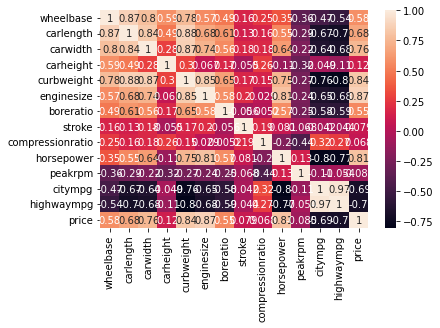

In [ ]:
sns.heatmap(df[numericas_].corr(),annot = True);

* La distancia entre ejes(wheelbase) tiene una alta correlación positiva
con la longitud del vehículo, el ancho del vehículo y el  peso de un automóvil sin ocupantes ni equipaje(curbweight)
* La longitud del vehículo tiene  alta correlación positiva con el  peso de un automóvil sin ocupantes ni equipaje.
* La longitud del vehículo tiene una correlación negativa con  kilometraje en carretera
* El ancho del vehículo tiene una alta correlación positiva con el peso en orden de marcha y el tamaño del motor
* El tamaño del motor tiene una alta correlación positiva con la potencia
* El  peso de un automóvil sin ocupantes ni equipaje tiene una alta correlación positiva con el tamaño del motor y la potencia,
* Hay correlación negativa entre kilometraje en carretera Y el  peso de un automóvil sin ocupantes
* Caballos de fuerza tiene una correlación negativa con kilometraje en  ciudad y carretera
* Kilometraje en  ciudad y carretera están altamente correlacionados


# 3. Limpieza y transformación de datos

## Tratamiento de datos atípicos

Se corre un codigo que permite un tratamiento de los datos atipicos, esta parte en concreto no es de mi autoria, tomado de AREZOO DAHESH


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
# -------------------------------------------

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
# -------------------------------------------

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
# -------------------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
def outlier_detect(df, col):
    q1_col = Q1[col]
    iqr_col = IQR[col]
    q3_col = Q3[col]
    return df[((df[col] < (q1_col - 1.5 * iqr_col)) |(df[col] > (q3_col + 1.5 * iqr_col)))]

# -------------------------------------------
def lower_outlier(df, col):
    q1_col = Q1[col]
    iqr_col = IQR[col]
    q3_col = Q3[col]
    lower = df[(df[col] < (q1_col - 1.5 * iqr_col))]
    return lower

# -------------------------------------------
def upper_outlier(df, col):
    q1_col = Q1[col]
    iqr_col = IQR[col]
    q3_col = Q3[col]
    upper = df[(df[col] > (q3_col + 1.5 * iqr_col))]
    return upper

# -------------------------------------------
def replace_upper(df, col):
    q1_col = Q1[col]
    iqr_col = IQR[col]
    q3_col = Q3[col]
    tmp = 9999999
    upper = q3_col + 1.5 * iqr_col
    df[col] = df[col].where(lambda x: (x < (upper)), tmp)
    df[col] = df[col].replace(tmp, upper)
    print('outlire replace with upper bound - {}' .format(col))

# -------------------------------------------
def replace_lower(df, col):
    q1_col = Q1[col]
    iqr_col = IQR[col]
    q3_col = Q3[col]
    tmp = 1111111
    lower = q1_col - 1.5 * iqr_col
    df[col] = df[col].where(lambda x: (x > (lower)), tmp)
    df[col] = df[col].replace(tmp, lower)
    print('outlire replace with lower bound - {}' .format(col))

# -------------------------------------------
CV = KFold(n_splits=10, random_state=0, shuffle=True)

def GridSearch_Tune(model, Data, X, y, params):

    clf = GridSearchCV(model, params, scoring ='r2', cv = CV, n_jobs=-1)
    clf.fit(X, y)

    print("best score is :" , clf.best_score_)
    print("best estimator is :" , clf.best_estimator_)
    print("best Params is :" , clf.best_params_)

    return (clf.best_score_)

# -------------------------------------------
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

# -------------------------------------------
def build_model(x,y):
    x = sm.add_constant(x)
    lm = sm.OLS(y,x).fit()
    print(lm.summary())
    return x, lm

In [ ]:
import scipy
from scipy.stats import shapiro
for i in range(len(numericas_ )):
    stat,p = shapiro(df[numericas_ [i]])
    print(numericas_ [i])
    print('P_value=%.3f' % (p))
    print("*******************************")# se trabaja con el test de shapiro  donde la hipotesis nula es que los datos siguen
    #una distribución normal

wheelbase
P_value=0.000
*******************************
carlength
P_value=0.010
*******************************
carwidth
P_value=0.000
*******************************
carheight
P_value=0.022
*******************************
curbweight
P_value=0.000
*******************************
enginesize
P_value=0.000
*******************************
boreratio
P_value=0.000
*******************************
stroke
P_value=0.000
*******************************
compressionratio
P_value=0.000
*******************************
horsepower
P_value=0.000
*******************************
peakrpm
P_value=0.000
*******************************
citympg
P_value=0.000
*******************************
highwaympg
P_value=0.001
*******************************
price
P_value=0.000
*******************************


In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [ ]:
for i in range(len(numericas_)):
    print("IQR => {}: {}".format(numericas_[i],(outlier_detect(df[numericas_],numericas_[i]).shape[0])))

IQR => wheelbase: 3
IQR => carlength: 1
IQR => carwidth: 8
IQR => carheight: 0
IQR => curbweight: 0
IQR => enginesize: 10
IQR => boreratio: 0
IQR => stroke: 20
IQR => compressionratio: 28
IQR => horsepower: 6
IQR => peakrpm: 2
IQR => citympg: 2
IQR => highwaympg: 3
IQR => price: 15


In [ ]:
outlier = []
for i in range(len(numericas_)):
    if outlier_detect(df[numericas_],numericas_[i]).shape[0] !=0:
        outlier.append(numericas_[i])
outlier

['wheelbase',
 'carlength',
 'carwidth',
 'enginesize',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [ ]:
for i in range(len(outlier)):
    replace_upper(df, outlier[i])

print("\n*******************************************\n")
for i in range(len(outlier)):
    replace_lower(df, outlier[i])

outlire replace with upper bound - wheelbase
outlire replace with upper bound - carlength
outlire replace with upper bound - carwidth
outlire replace with upper bound - enginesize
outlire replace with upper bound - stroke
outlire replace with upper bound - compressionratio
outlire replace with upper bound - horsepower
outlire replace with upper bound - peakrpm
outlire replace with upper bound - citympg
outlire replace with upper bound - highwaympg
outlire replace with upper bound - price

*******************************************

outlire replace with lower bound - wheelbase
outlire replace with lower bound - carlength
outlire replace with lower bound - carwidth
outlire replace with lower bound - enginesize
outlire replace with lower bound - stroke
outlire replace with lower bound - compressionratio
outlire replace with lower bound - horsepower
outlire replace with lower bound - peakrpm
outlire replace with lower bound - citympg
outlire replace with lower bound - highwaympg
outlire r

In [ ]:
for i in range(len(numericas_)):
    print("IQR => {}: {}".format(numericas_[i],(outlier_detect(df[numericas_],numericas_[i]).shape[0])))

IQR => wheelbase: 0
IQR => carlength: 0
IQR => carwidth: 0
IQR => carheight: 0
IQR => curbweight: 0
IQR => enginesize: 0
IQR => boreratio: 0
IQR => stroke: 0
IQR => compressionratio: 0
IQR => horsepower: 0
IQR => peakrpm: 0
IQR => citympg: 0
IQR => highwaympg: 0
IQR => price: 0


Las variables categoricas se transforman a variables dummy

In [ ]:
df_dummy = pd.get_dummies(df, prefix=categoricas_, columns=categoricas_, drop_first=True)
df_dummy.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,0,0,0,0,1,0,0


## Variables duplicadas

Se revisa cuantas variables duplicadas existen, se encuentran 2

In [ ]:
df_dummy.loc[df.duplicated()].shape

(2, 69)

se procede a eliminar las variables duplicadas

In [ ]:
df_dummy = df_dummy.drop_duplicates()
df_dummy.shape

(203, 69)

## Normalizar

In [ ]:
df = (df_dummy-df_dummy.min()) / (df_dummy.max()-df_dummy.min())
df

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,0.072333,0.413433,0.351852,0.083333,0.411171,0.472603,0.664286,0.016667,0.50000,0.459854,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.072333,0.413433,0.351852,0.083333,0.411171,0.472603,0.664286,0.016667,0.50000,0.459854,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.285714,0.449254,0.481481,0.383333,0.517843,0.623288,0.100000,0.675000,0.50000,0.773723,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.477396,0.529851,0.546296,0.541667,0.329325,0.328767,0.464286,0.616667,0.81250,0.394161,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.462929,0.529851,0.564815,0.541667,0.518231,0.513699,0.464286,0.616667,0.18750,0.489051,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.813743,0.711940,0.796296,0.641667,0.567882,0.547945,0.885714,0.408333,0.65625,0.481752,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
201,0.813743,0.711940,0.787037,0.641667,0.605508,0.547945,0.885714,0.408333,0.40625,0.817518,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
202,0.813743,0.711940,0.796296,0.641667,0.591156,0.767123,0.742857,0.175000,0.43750,0.627737,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
203,0.813743,0.711940,0.796296,0.641667,0.670675,0.575342,0.335714,0.616667,1.00000,0.423358,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# 4. Entrenamiento y validación del modelo de predicción

In [ ]:
import sklearn as sk
from sklearn import model_selection
from sklearn import neural_network
from sklearn import metrics

from sklearn.neural_network import MLPRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn import set_config
import multiprocessing

In [ ]:
X = df[df.columns.drop("price")]
y = df["price"]

In [ ]:
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.20, random_state=42)

A pesar de que son muchas las variables que se utilizan a la hora de realizar una red neuronal en este caso nos centramos en algunas en especifico


*   hidden_layer_sizes: número y tamaño de las capas ocultas. Por ejemplo, (100) para una única capa oculta con 100 neuronas, y (16, 16) para dos capas ocultas de 16 neuronas de cada una. El valor por defecto es (100,).
*   activation: función de activación de las capas ocultas. Puede ser: {'identity', 'logistic', 'tanh', 'relu'}. La misma función de activación se aplica a todas las capas ocultas, no se permiten distintas. El valor por defecto es 'relu'
* learning_rate_init: valor inicial de learning rate. Solo se utiliza cuando el solver es 'sgd' o 'adam'. Por defecto el valor es 0.001.
* max_iter: número máximo de iteraciones de entrenamiento. Para los solvers estocásticos ('sgd' y 'adam') este valor se corresponde con el número de épocas (cuantas veces participa en el entrenamiento cada observación). Se emplean por defecto 200.
* random_state: semilla utilizada para todos los pasos del entrenaiento que requieren de valores aleatorios (inicialización depesos, splits, bias).




In [ ]:
# se realiza un ejemplo
reg_1=sk.neural_network.MLPRegressor(
               hidden_layer_sizes=[4, 3],
                activation='relu',
                learning_rate_init=0.001,
                max_iter=500,
                random_state=42)
reg_1.fit(X_train, y_train)
scores = sk.model_selection.cross_val_score(reg_1, X, y,scoring='r2')
scores

array([0.51849927, 0.0492835 , 0.41048916, 0.38740635, 0.16176356])

se procede a ver el resultado de la red

In [ ]:
y_pred = reg_1.predict(X_test)
print(sk.metrics.mean_squared_error(y_test, y_pred))
print(sk.metrics.r2_score(y_test, y_pred))

0.057454972121978226
0.4624309203865239


## optimización de parametros

Primero vemos las variables por aparte, primero se realiza con el numero maximo de interaciones


In [ ]:
nums = [500,1000,2000]

for i in range(len(nums)):

    model= sk.neural_network.MLPRegressor(hidden_layer_sizes=[4,3],
                                  activation='relu',
                                  learning_rate_init=0.01,
                                   max_iter=nums[i],
                                   random_state=42)

    print(model.fit(X_train, y_train))
    print(sk.metrics.mean_squared_error(y_test, model.predict(X_test)))
    print(sk.metrics.r2_score(y_test, model.predict(X_test)))



MLPRegressor(hidden_layer_sizes=[4, 3], learning_rate_init=0.01, max_iter=500,
             random_state=42)
0.02260530831768927
0.7884967246886783
MLPRegressor(hidden_layer_sizes=[4, 3], learning_rate_init=0.01, max_iter=1000,
             random_state=42)
0.02260530831768927
0.7884967246886783
MLPRegressor(hidden_layer_sizes=[4, 3], learning_rate_init=0.01, max_iter=2000,
             random_state=42)
0.02260530831768927
0.7884967246886783


parece no haber diferencia, al cambiar solo la maxima interacion

Se prueba después el learning rate

In [ ]:
nums = [0.0001,0.001,0.01,0.1]

for i in range(len(nums)):

    model= sk.neural_network.MLPRegressor(hidden_layer_sizes=[4,3],
                                  activation='relu',
                                  learning_rate_init=nums[i],
                                   max_iter=500,
                                   random_state=42)

    print(model.fit(X_train, y_train))
    print(sk.metrics.mean_squared_error(y_test, model.predict(X_test)))
    print(sk.metrics.r2_score(y_test, model.predict(X_test)))


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPRegressor(hidden_layer_sizes=[4, 3], learning_rate_init=0.0001, max_iter=500,
             random_state=42)
0.3091002156449384
-1.8920511540726057
MLPRegressor(hidden_layer_sizes=[4, 3], max_iter=500, random_state=42)
0.057454972121978226
0.4624309203865239
MLPRegressor(hidden_layer_sizes=[4, 3], learning_rate_init=0.01, max_iter=500,
             random_state=42)
0.02260530831768927
0.7884967246886783
MLPRegressor(hidden_layer_sizes=[4, 3], learning_rate_init=0.1, max_iter=500,
             random_state=42)
0.15799463066413108
-0.4782537533857518


Al cambiar solo el learning_rate_init parece ser que es mejor de 0.01

Finalmente se prueba con  el número y tamaño de las capas ocultas

In [ ]:
nums = [(3),(4),(10),(20),(3,4),(10, 10),(20,20),(10,10,10)]

for i in range(len(nums)):

    model= sk.neural_network.MLPRegressor(hidden_layer_sizes=nums[i],
                                  activation='relu',
                                  learning_rate_init=0.01,
                                   max_iter=500,
                                   random_state=42)

    print(model.fit(X_train, y_train))
    print(sk.metrics.mean_squared_error(y_test, model.predict(X_test)))
    print(sk.metrics.r2_score(y_test, model.predict(X_test)))


MLPRegressor(hidden_layer_sizes=3, learning_rate_init=0.01, max_iter=500,
             random_state=42)
0.013713722560004455
0.8716895519676682
MLPRegressor(hidden_layer_sizes=4, learning_rate_init=0.01, max_iter=500,
             random_state=42)
0.11456393299661449
-0.0719007553800819
MLPRegressor(hidden_layer_sizes=10, learning_rate_init=0.01, max_iter=500,
             random_state=42)
0.02682402773837013
0.7490248907922454
MLPRegressor(hidden_layer_sizes=20, learning_rate_init=0.01, max_iter=500,
             random_state=42)
0.023052670039234027
0.784311049889384
MLPRegressor(hidden_layer_sizes=(3, 4), learning_rate_init=0.01, max_iter=500,
             random_state=42)
0.02383800110342007
0.7769632141534257
MLPRegressor(hidden_layer_sizes=(10, 10), learning_rate_init=0.01, max_iter=500,
             random_state=42)
0.016408527824465075
0.8464759989495214
MLPRegressor(hidden_layer_sizes=(20, 20), learning_rate_init=0.01, max_iter=500,
             random_state=42)
0.014173173690

Parece ser que al tener 2 capas ocultas de 20 es mejor que 3 de 10

Despues se decide hacer una validacion cambindo mas parametros al mismo tiempo

In [ ]:
param_distributions = {
    'hidden_layer_sizes': [(3),(4),(10),(20),(3,4),(10, 10),(20,20),(10,10,10)],
    'max_iter': [500,1000],
    'learning_rate_init': [0.0001,0.001, 0.01, 0.1],
}

se realiza la busqueda por validación cruzada

In [ ]:
grid = RandomizedSearchCV(
        estimator  = sk.neural_network.MLPRegressor(activation='relu'),
        param_distributions = param_distributions,
        n_iter     = 50,
        scoring    = 'neg_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = 5,
        verbose    = 0,
        random_state = 42,
        return_train_score = True
       )


In [ ]:
grid.fit(X = X_train, y = y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_mult

RandomizedSearchCV(cv=5, estimator=MLPRegressor(), n_iter=50, n_jobs=1,
                   param_distributions={'hidden_layer_sizes': [3, 4, 10, 20,
                                                               (3, 4), (10, 10),
                                                               (20, 20),
                                                               (10, 10, 10)],
                                        'learning_rate_init': [0.0001, 0.001,
                                                               0.01, 0.1],
                                        'max_iter': [500, 1000]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_squared_error')

Se evidencian los resultados del grid

In [ ]:
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(10)

,param_max_iter,param_learning_rate_init,param_hidden_layer_sizes,mean_test_score,std_test_score,mean_train_score,std_train_score
31,500,0.01,"(10, 10, 10)",-0.007794,0.003767,-0.003750,0.000910
9,1000,0.01,"(10, 10, 10)",-0.009451,0.004387,-0.004063,0.001490
0,500,0.01,"(20, 20)",-0.009484,0.003709,-0.002994,0.000900
40,1000,0.01,"(10, 10)",-0.010097,0.005152,-0.003046,0.000693
42,1000,0.01,20,-0.010249,0.004027,-0.002777,0.000669
3,500,0.01,"(10, 10)",-0.010970,0.004932,-0.004208,0.000779
46,1000,0.01,10,-0.013235,0.003730,-0.003990,0.001059
30,1000,0.001,"(10, 10, 10)",-0.014845,0.006495,-0.008190,0.001564
7,500,0.01,4,-0.015413,0.008278,-0.009922,0.004969
15,500,0.001,"(20, 20)",-0.015644,0.004087,-0.007850,0.002015


se obtiene el mejor modelo

In [ ]:
modelo_final = grid.best_estimator_
y_pred = modelo_final.predict(X_test)
print(sk.metrics.mean_squared_error(y_test, y_pred))
print(sk.metrics.r2_score(y_test, y_pred))

0.015012308181642675
0.8595395247090819


se obtinenen los parametros del mejor modelo

In [ ]:
modelo_final.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (10, 10, 10),
 'learning_rate': 'constant',
 'learning_rate_init': 0.01,
 'max_fun': 15000,
 'max_iter': 500,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

Es notoria la necesidad de optimizar los hiperparametros al mismo tiempo y no cada uno por separado